# Prompt
We want to do analysis on the card game combination distribution.

Game setup ("Preferans"): playing from standard 36 deck, without 6s, so in total 32 cards. 3 players, so each gets 10 random cards, 2 cards goes to the bank.

We want to do analysis on the possible distributions of different suits betnween opponents hands, knowing the counts on the current hand, such as if the current player has 3 spades, how possible ditribution on other hands could look like. let's build frequency diagram, that should be used to estimate chanses, before opening the bank and after it got dislosed on the current player.

Use numpy and pandas and other libs to visualize in jupyter notebook.

Creating a new notebook:
* **Import Required Libraries**
* **Define Game Setup and Card Deck**
* **Simulate Card Dealing**
* **Analyze Suit Distribution in Player's Hand**
* **Calculate Possible Opponent Suit Distributions**
* **Build Frequency Diagrams of Suit Distributions**
* **Estimate Chances Before and After Bank Disclosure**
* **Visualize Results with Plots**



In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, permutations
from collections import Counter
import random

# Set seed for reproducibility
np.random.seed(42)

# Constants
SUITS = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
CARDS_PER_SUIT = 8  # From 7 to Ace without 6s
TOTAL_CARDS = 32
CARDS_PER_PLAYER = 10
BANK_CARDS = 2
NUM_SIMULATIONS = 10000000

# Create deck
deck = [f"{rank}_{suit}" for suit in SUITS for rank in range(7, 15)]  # ranks 7-14 represent 7-Ace

In [62]:
def count_suits(hand):
    """Return the count of suits in a hand."""
    suits = [card.split('_')[1] for card in hand]
    return Counter(suits)

In [63]:
TARGET_SUIT = 'Spades'

# Initialize nested dictionary to store probabilities for all target suit counts
all_distributions_other_hands = {}
all_distributions_bank = {}

# Simulate for all possible counts of target suit (0 to 8) in the current hand
for target_count in range(0, 9):
    dist_other_hands = Counter()
    dist_bank = Counter()

    for _ in range(NUM_SIMULATIONS // 9):  # Divide total simulation budget
        shuffled_deck = deck.copy()
        random.shuffle(shuffled_deck)

        hand1 = shuffled_deck[:10]
        hand2 = shuffled_deck[10:20]
        hand3 = shuffled_deck[20:30]
        bank = shuffled_deck[30:]

        hand1_suits = count_suits(hand1)
        bank_suits = count_suits(bank)

        if hand1_suits[TARGET_SUIT] == target_count:
            hand2_suits = count_suits(hand2)
            hand3_suits = count_suits(hand3)
            dist_other_hands[(hand2_suits[TARGET_SUIT], hand3_suits[TARGET_SUIT])] += 1
            dist_bank[bank_suits[TARGET_SUIT]] += 1

    # Normalize to probabilities
    total_other_hands = sum(dist_other_hands.values())
    prob_other_hands = {k: v / total_other_hands for k, v in dist_other_hands.items()} if total_other_hands > 0 else {}
    all_distributions_other_hands[target_count] = prob_other_hands

    total_bank = sum(dist_bank.values())
    prob_bank = {k: v / total_bank for k, v in dist_bank.items()} if total_bank > 0 else {}
    all_distributions_bank[target_count] = prob_bank

In [76]:
def plot_probabilities(example_count, all_distributions_other_hands, all_distributions_bank):
    """Plot probability distributions for a given example count, including the bank."""
    def prob_to_df(prob_dict):
        """Convert probabilities for other hands into a DataFrame."""
        data = []
        for (c2, c3), prob in prob_dict.items():
            data.append({f'Player2_{TARGET_SUIT}': c2, f'Player3_{TARGET_SUIT}': c3, 'Probability': prob})
        df = pd.DataFrame(data)
        pivot = df.pivot_table(index=f'Player2_{TARGET_SUIT}', columns=f'Player3_{TARGET_SUIT}', values='Probability', fill_value=0)
        return pivot

    def bank_prob_to_df(prob_dict):
        """Convert probabilities for the bank into a DataFrame."""
        data = [{f'Bank_{TARGET_SUIT}': count, 'Probability': prob} for count, prob in prob_dict.items()]
        return pd.DataFrame(data)

    other_hands_df = prob_to_df(all_distributions_other_hands[example_count])
    bank_df = bank_prob_to_df(all_distributions_bank[example_count])

    # Plot example probability distributions
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Heatmap for other hands
    sns.heatmap(other_hands_df, annot=True, fmt=".2%", cmap="Blues", ax=axs[0])
    axs[0].set_title(f"{TARGET_SUIT} Probabilities (Count={example_count}) - Other Hands")
    axs[0].set_xlabel(f"Player 3 {TARGET_SUIT}")
    axs[0].set_ylabel(f"Player 2 {TARGET_SUIT}")

    # Bar plot for bank distribution
    sns.barplot(x=f'Bank_{TARGET_SUIT}', y='Probability', data=bank_df, ax=axs[1], palette="Greens")
    axs[1].set_title(f"{TARGET_SUIT} Probabilities (Count={example_count}) - Bank")
    axs[1].set_xlabel(f"Bank {TARGET_SUIT}")
    axs[1].set_ylabel("Probability")

    plt.tight_layout()
    plt.show()

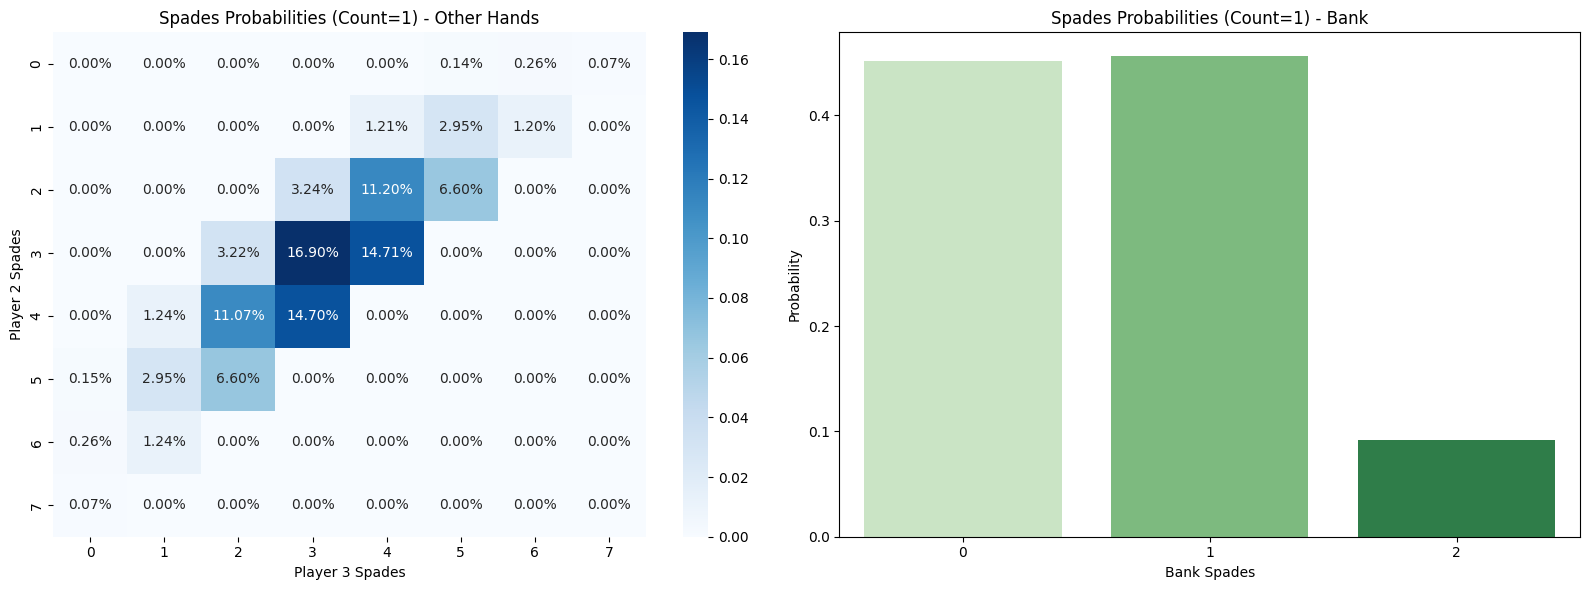

In [83]:
example_at_hand_count = 1
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)

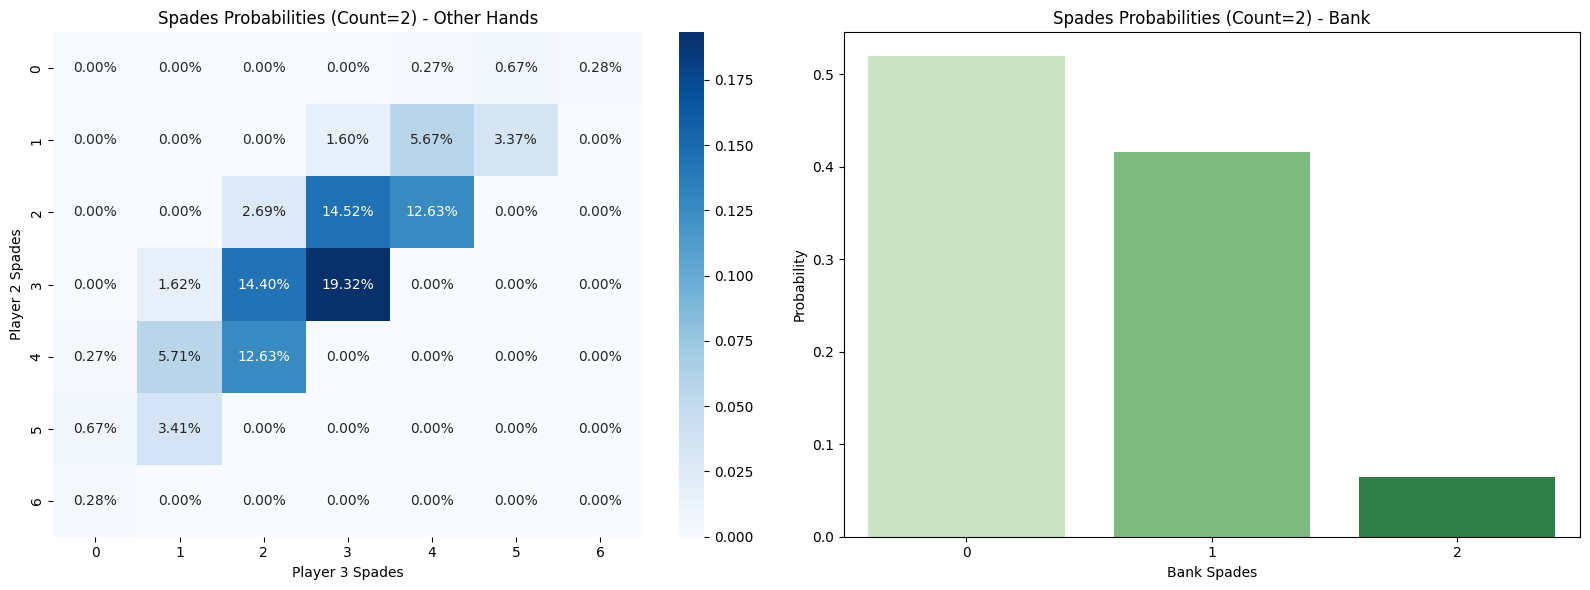

In [77]:
example_at_hand_count = 2
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)

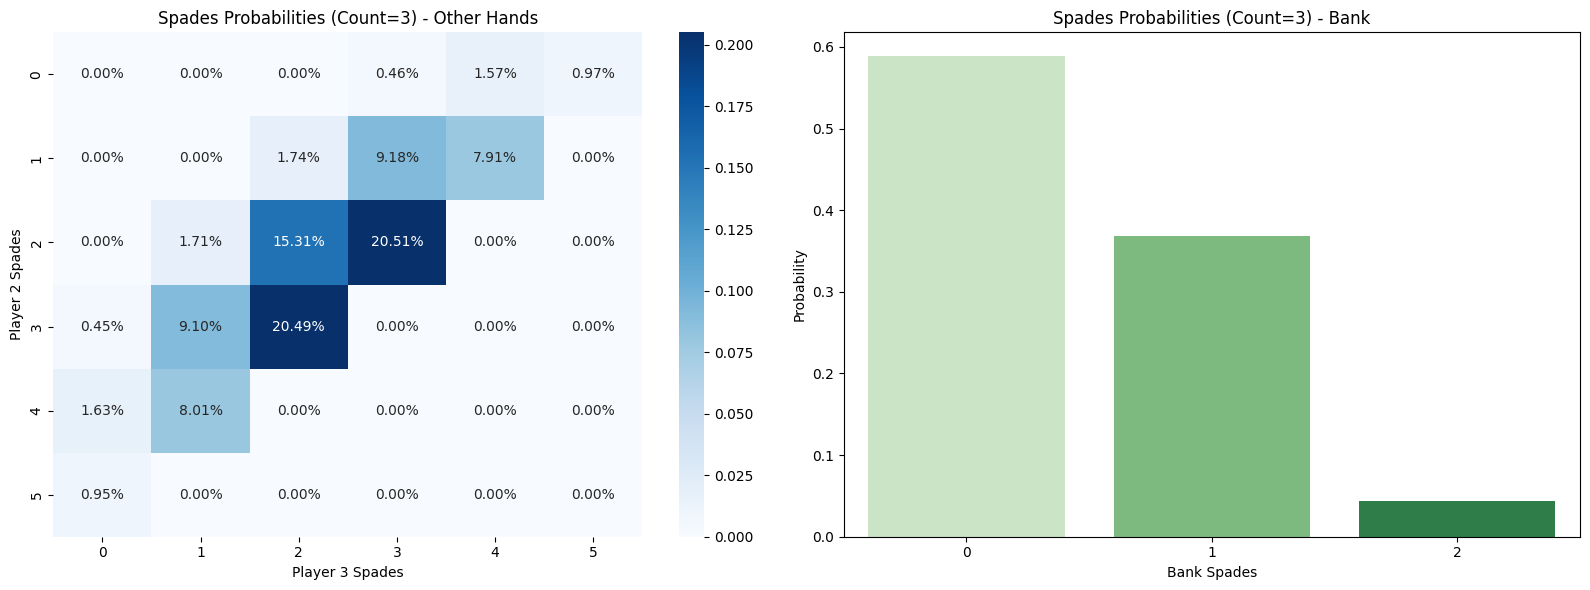

In [78]:
example_at_hand_count = 3
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)

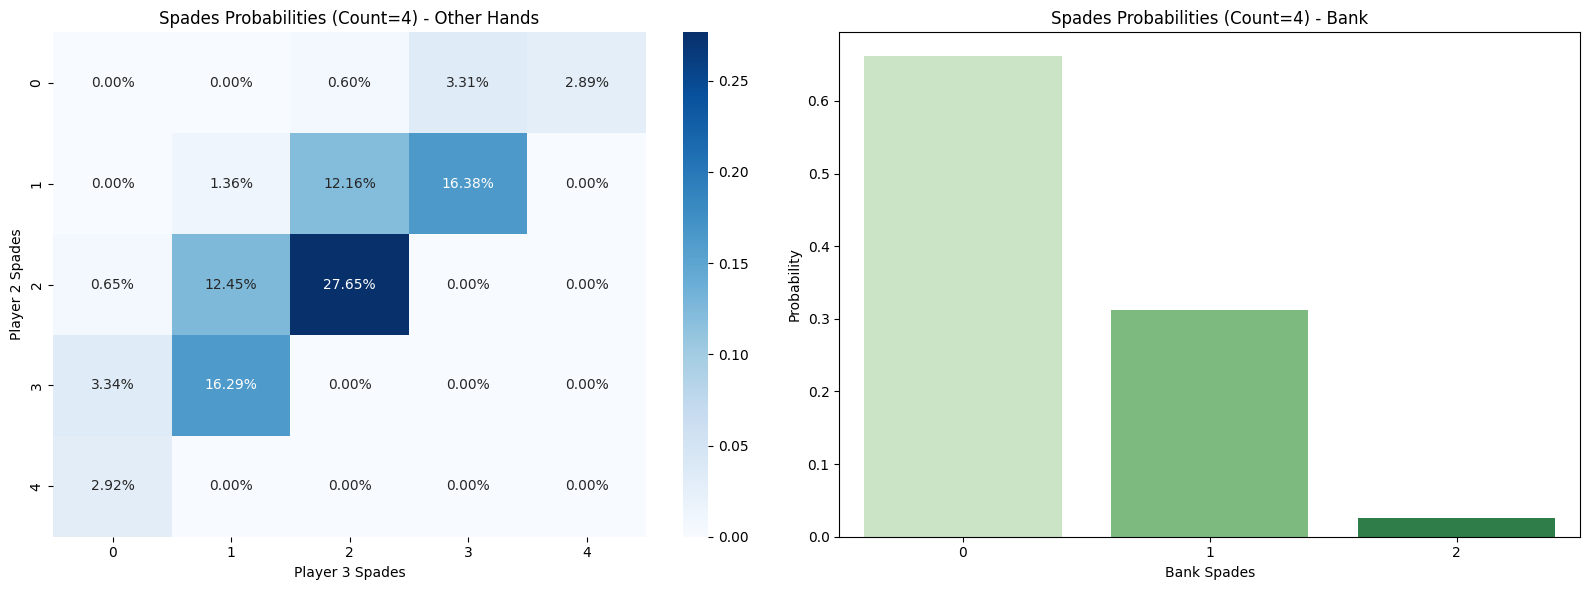

In [79]:
example_at_hand_count = 4
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)

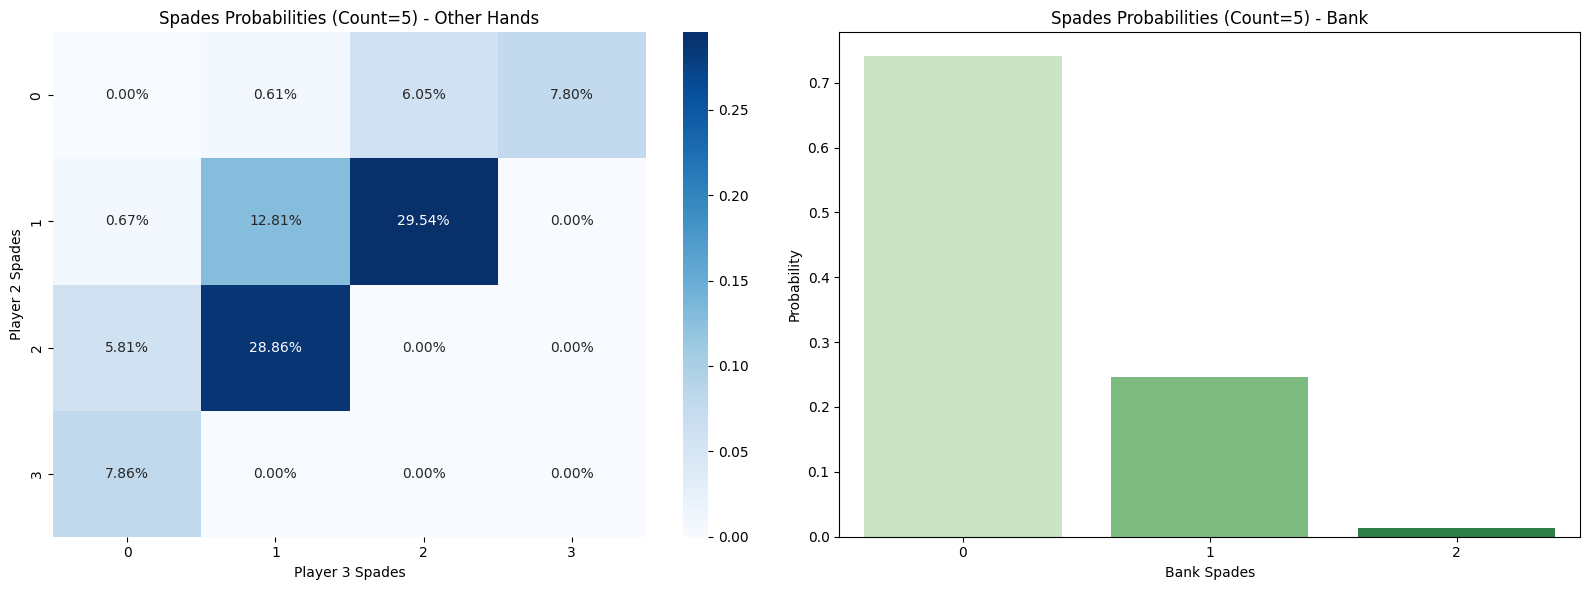

In [80]:
example_at_hand_count = 5
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)

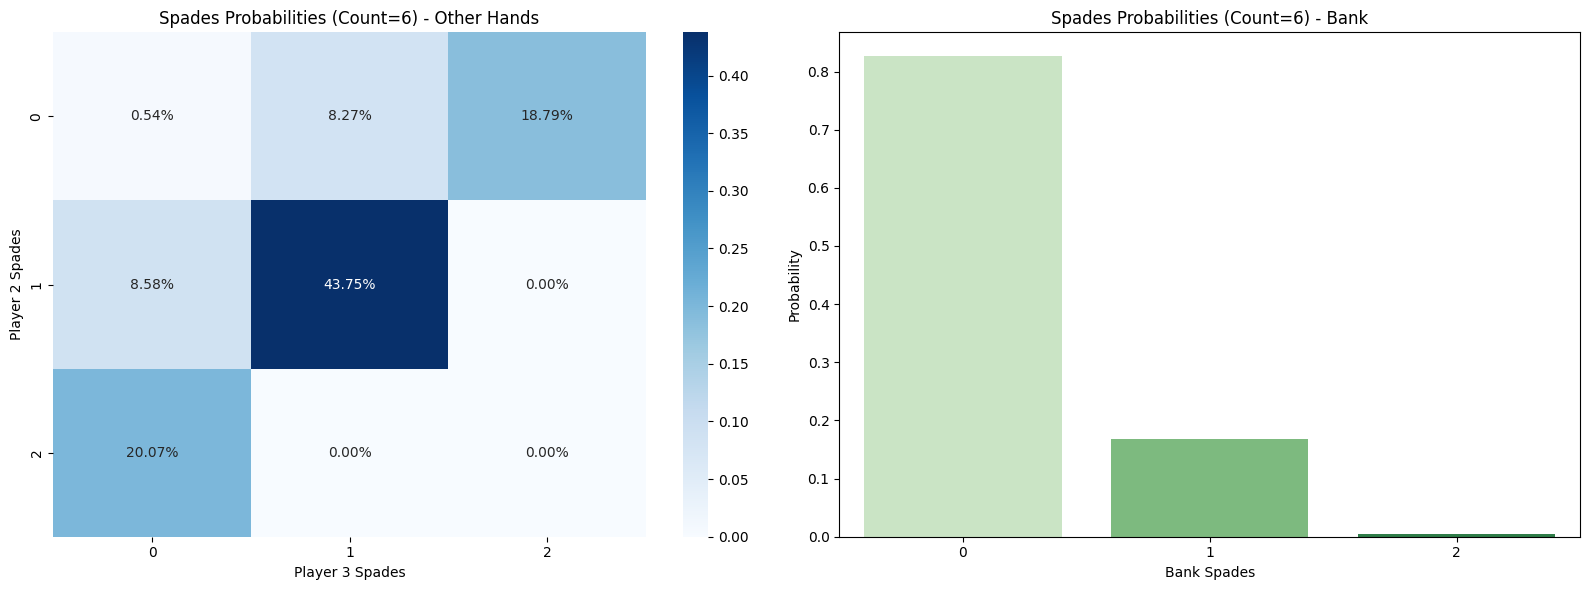

In [81]:
example_at_hand_count = 6
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)

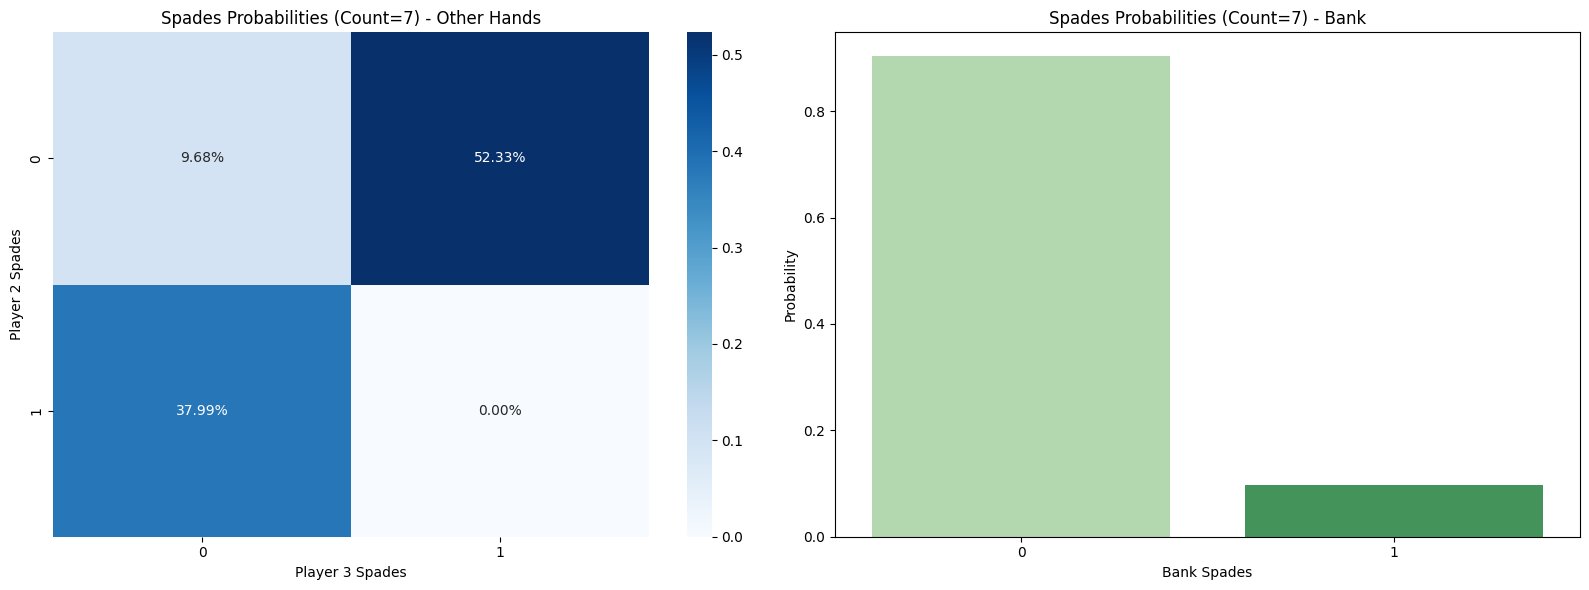

In [82]:
example_at_hand_count = 7
plot_probabilities(example_at_hand_count, 
                   all_distributions_other_hands, 
                   all_distributions_bank)